# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

/var/folders/4k/byg8gjqx3ld5757qnw63s0v00000gn/T/ipykernel_41224/4247486433.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Generate two sets of spiral data points with opposite angles

data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

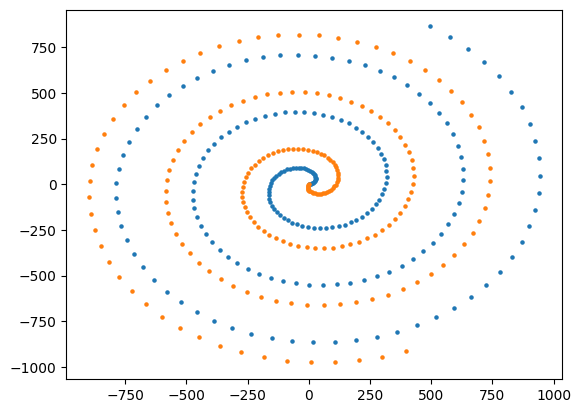

In [3]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = pd.concat([df1, df2], ignore_index=True)
df['CLASS'].value_counts()

CLASS
0    200
1    200
Name: count, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [5]:
df.head()

,X,Y,CLASS
0,0.000000,0.000000,0
1,4.975021,0.499167,0
2,9.800666,1.986693,0
3,14.330047,4.432803,0
4,18.421220,7.788367,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       400 non-null    float64
 1   Y       400 non-null    float64
 2   CLASS   400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [7]:
df.shape

(400, 3)

In [8]:
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam


In [9]:
X = df.drop(columns='CLASS')
y = df['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled_np = scaler.transform(X_train)
X_test_scaled_np  = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_test  = pd.DataFrame(X_test_scaled_np,  columns=X_test.columns, index=X_test.index)

In [11]:
# creating a sequential model 

model = keras.Sequential([
    layers.Dense(16, input_shape=(2,)),
    layers.Dense(8),
    layers.Dense(1, activation='sigmoid')])


In [12]:
# compiling the model
optimizer = keras.optimizers.Adam(learning_rate=0.3)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# fitting the train data

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])


Epoch 1/150
32/32 [==============================] - 0s 3ms/step - loss: 1.5272 - accuracy: 0.4969 - val_loss: 1.1602 - val_accuracy: 0.5000
Epoch 2/150
32/32 [==============================] - 0s 1ms/step - loss: 0.7820 - accuracy: 0.4563 - val_loss: 0.7492 - val_accuracy: 0.4125
Epoch 3/150
32/32 [==============================] - 0s 1ms/step - loss: 0.8529 - accuracy: 0.5125 - val_loss: 0.7229 - val_accuracy: 0.5500
Epoch 4/150
32/32 [==============================] - 0s 781us/step - loss: 0.7625 - accuracy: 0.5156 - val_loss: 0.7393 - val_accuracy: 0.5500
Epoch 5/150
32/32 [==============================] - 0s 933us/step - loss: 0.7723 - accuracy: 0.4406 - val_loss: 0.6999 - val_accuracy: 0.4875
Epoch 6/150
32/32 [==============================] - 0s 782us/step - loss: 0.7003 - accuracy: 0.5344 - val_loss: 0.7204 - val_accuracy: 0.5625
Epoch 7/150
32/32 [==============================] - 0s 795us/step - loss: 0.7573 - accuracy: 0.4719 - val_loss: 0.7001 - val_accuracy: 0.5500
Epoch

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 0s 1ms/step - loss: 0.7346 - accuracy: 0.4906 - val_loss: 0.6814 - val_accuracy: 0.5750
Epoch 9/150
32/32 [==============================] - 0s 845us/step - loss: 0.7353 - accuracy: 0.4656 - val_loss: 0.6911 - val_accuracy: 0.5500
Epoch 10/150
32/32 [==============================] - 0s 808us/step - loss: 0.7107 - accuracy: 0.4812 - val_loss: 0.7138 - val_accuracy: 0.5125
Epoch 11/150
32/32 [==============================] - 0s 813us/step - loss: 0.7092 - accuracy: 0.4938 - val_loss: 0.7059 - val_accuracy: 0.4500
Epoch 12/150
32/32 [==============================] - 0s 783us/step - loss: 0.7096 - accuracy: 0.4625 - val_loss: 0.6883 - val_accuracy: 0.5500
Epoch 13/150
32/32 [==============================] - 0s 777us/step - loss: 0.7036 - accuracy: 0.4969 - val_loss: 0.6930 - val_accuracy: 0.5125
Epoch 14/150
32/32 [==============================] - 0s 783us/step - loss: 0.7144 - accuracy: 0.5031 - val_loss: 0.7005 - val_accuracy: 0.4125
Epoch 15

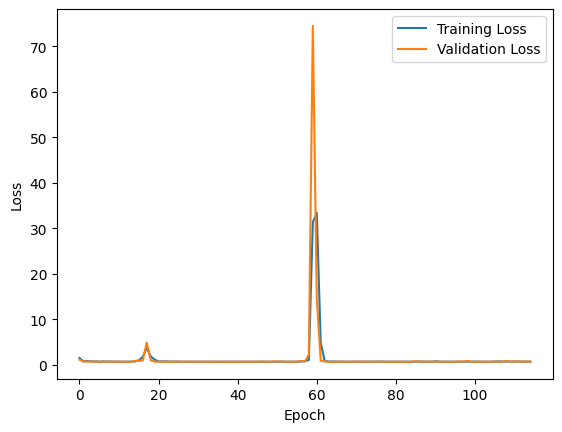

In [14]:
# plot training history

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# evaluating the model on the test set

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

3/3 [==============================] - 0s 1ms/step - loss: 0.6565 - accuracy: 0.6375
Test Loss: 0.6565, Test Accuracy: 0.6375
